In [3]:
import json, shapely, fiona, os
import seaborn as sns
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
trails   = gpd.read_file('data/OSMPTrails.shp')
prairie  = gpd.read_file('data/OSMPPrairieDogColonies.shp')
print("Same CRS: ", trails.crs==prairie.crs)
trails.head(1)


Same CRS:  True


,OWNER,Bicycles,Display,TrailType,DateFrom,DateTo,SegmentID,Horses,RID,TrlID,Mileage,MeasuredFe,TrailName,LastGPSd,WhyChanged,RegionalNa,Shape_len,geometry
0,OSMP,No,Yes,Hiking Trail,2005-12-31,2099-12-31,296-357-356,No,1000,296,0.106,-9999,Boulder Falls,2016-08-31,Re-GPS'd to get better data,None,562.147648,LINESTRING (3026375.131643802 1244564.51216189...


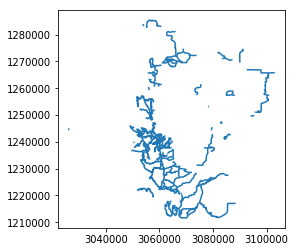

In [10]:
trails.plot()

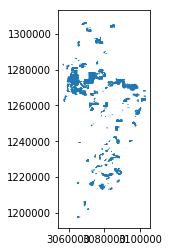

In [11]:
prairie.plot()

In [17]:
# Now do a spatial join to learn which trails go through prairie dog zones!
trails_with_prairie_dogs = gpd.sjoin(trails, prairie)
trails_with_prairie_dogs.head(3)

,OWNER,Bicycles,Display,TrailType,DateFrom,DateTo,SegmentID,Horses,RID,TrlID,...,Acres,Hectares,Plague,Manager,Perimeter,Activity,YearAcquir,sdeWildlif,Shape_area,Shape_len_right
3,OSMP,Yes,Yes,Multi-Use Trail,2016-10-25,2099-12-31,116-425-424,Yes,1544,116,...,61.358940,24.831082,None,OSMP,13658.922689,2.0,1981,2.672785e+06,2.672785e+06,13658.922689
3,OSMP,Yes,Yes,Multi-Use Trail,2016-10-25,2099-12-31,116-425-424,Yes,1544,116,...,90.895581,36.784137,2009,OSMP,15602.468859,2.0,1981,3.959396e+06,3.959396e+06,15602.468859
191,OSMP,Yes,Yes,Multi-Use Trail,2005-12-31,2099-12-31,115-432-431,Yes,1142,115,...,90.895581,36.784137,2009,OSMP,15602.468859,2.0,1981,3.959396e+06,3.959396e+06,15602.468859


In [107]:
trails_with_prairie_dogs = trails_with_prairie_dogs.dissolve(
        by='TrlID',aggfunc='sum')
trails_with_prairie_dogs.head(10)


,geometry,RID,Mileage,MeasuredFe,Shape_len_left,index_right,PD_ID,Year,Acres,Hectares,Perimeter,Activity,sdeWildlif,Shape_area,Shape_len_right
TrlID,,,,,,,,,,,,,,,
110,(LINESTRING (3084843.749942556 1227491.8435513...,1096,0.348,1817,1837.656192,1275,135.0,2008.0,0.450726,0.182402,1237.545131,2.0,1.963353e+04,1.963353e+04,1237.545131
111,(LINESTRING (3080769.03794764 1226382.77884039...,1097,0.810,4214,4276.816763,13,83.0,2009.0,25.182960,10.191182,4958.195205,2.0,1.096965e+06,1.096965e+06,4958.195205
112,(LINESTRING (3082401.625233635 1211746.5873123...,1660,2.653,-9999,14009.784574,39,115.0,2009.0,0.095257,0.038549,301.094409,2.0,4.149388e+03,4.149388e+03,301.094409
114,(LINESTRING (3073937.591964886 1223344.6572919...,1107,0.112,568,592.536642,19,92.0,2009.0,30.909270,12.508538,15276.680374,2.0,1.346402e+06,1.346402e+06,15276.680373
116,(LINESTRING (3073269.582474142 1215145.0883893...,1544,0.178,-9999,939.742819,824,40.0,2003.0,61.358940,24.831082,13658.922689,2.0,2.672785e+06,2.672785e+06,13658.922689
119,(LINESTRING (3064860.732493967 1213731.4658884...,1121,1.133,6077,5980.464378,1338,56.0,2002.0,4.426366,1.791287,2307.443760,2.0,1.928117e+05,1.928117e+05,2307.443760
307,(LINESTRING (3070936.285631552 1228513.0869157...,1277,0.734,3896,3873.031941,964,33.0,2004.0,16.914309,6.844978,7666.897854,2.0,7.367843e+05,7.367843e+05,7666.897854
401,(LINESTRING (3058310.194085881 1268177.2310124...,1013,0.520,2777,2744.564618,995,67.0,2005.0,27.114764,10.972956,13626.760147,2.0,1.181114e+06,1.181114e+06,13626.760147
403,(LINESTRING (3057350.62612313 1262012.62621572...,1031,0.221,1173,1166.360096,453,38.0,2013.0,54.692894,22.133429,19098.789784,2.0,2.382413e+06,2.382413e+06,19098.789784


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


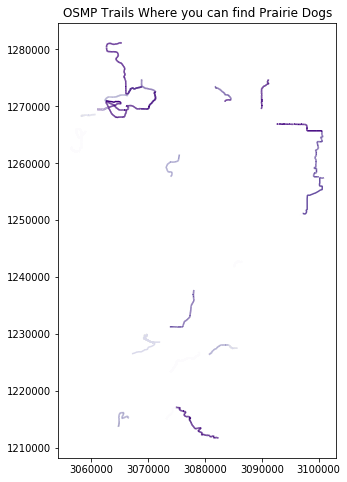

In [108]:
trails_with_prairie_dogs.plot(
    column = 'Mileage', 
    scheme='quantiles', 
    cmap='Purples', figsize=(8,8)
).set_title("OSMP Trails Where you can find Prairie Dogs");


# Vegetation?

In [96]:
veg = gpd.read_file('data/OSMPVegetation.shp')
print("Vegetation: ", len(veg))
veg.head(4)

Vegetation:  10060


,USNVC_ASSO,USNVC_ALLI,SUBCLASS,ACRES,NOTES,Wetland,Shape_area,Shape_len,d_USNVC_AS,d_USNVC_AL,d_SUBCLASS,geometry
0,None,Unknown,10,0.995209,None,None,43351.150604,1120.870316,None,None,Perennial Graminoid Vegetation,"POLYGON ((3052238.112783849 1252552.445504829,..."
1,None,A.124,0,5.755138,None,None,250692.808509,2816.661283,None,Ponderosa Pine Forest,Evergreen Forest,"POLYGON ((3051975.364830419 1252609.944442928,..."
2,None,Unknown,10,9.818098,None,None,427674.656770,4235.660611,None,None,Perennial Graminoid Vegetation,"POLYGON ((3052528.609129816 1252265.194787398,..."
3,None,A.124,0,7.246707,None,None,315665.298047,3529.528278,None,Ponderosa Pine Forest,Evergreen Forest,"POLYGON ((3052209.862279028 1252475.069846496,..."


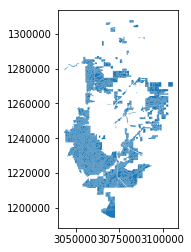

In [93]:
veg.plot()

In [141]:
veg.d_SUBCLASS.value_counts()

Perennial Graminoid Vegetation                         4940
Deciduous Shrubland                                    1472
Evergreen Woodland                                      923
Evergreen Forest                                        707
Deciduous Woodland                                      555
Boulder, Gravel, Cobble, or Talus Sparse Vegetation     251
Consolidated Rock Sparse Vegetation                     228
Annual graminoid or forb vegetation                     188
Water                                                   136
Perennial Forb Vegetation                               121
Evergreen Dwarf-shrubland                               120
Deciduous dwarf-shrubland                               108
Deciduous Forest                                        102
Developed                                                90
Evergreen Shrubland                                      52
Easement                                                 23
Not Mapped                              

In [147]:
#What if I wanted to ride my bike in Evergreen Forests?
bike_in_evergreen_forests = gpd.sjoin( 
    trails[trails.Bicycles=='Yes'], 
    veg[veg.d_SUBCLASS=='Evergreen Forest']
).dissolve(by='TrlID',aggfunc='sum')
print("Found {} trails with Bicycles through Evergreen Forests".format(len(bike_in_evergreen_forests)))
bike_in_evergreen_forests.head()

Found 4 trails with Bicycles through Evergreen Forests


,geometry,RID,Mileage,MeasuredFe,Shape_len_left,index_right,SUBCLASS,ACRES,Shape_area,Shape_len_right
TrlID,,,,,,,,,,
101,LINESTRING (3067413.970497727 1215250.38082964...,1122,1.018,-9999,5372.979354,2028,0,7.974046,3.473494e+05,6954.003814
119,(LINESTRING (3066515.972949892 1215200.6548792...,4495,2.697,14344,14239.127724,30615,0,154.890307,6.747022e+06,44060.087007
120,LINESTRING (3064860.492336974 1213724.26380313...,1123,1.112,5919,5872.325105,7442,0,75.078274,3.270410e+06,20450.002787
272,(LINESTRING (3053451.99514088 1241861.38042905...,13701,14.102,75635,74446.246299,68432,0,86.295079,3.759014e+06,42225.599513


In [148]:
wgs84 = bike_in_evergreen_forests.to_crs(
    {'init':'epsg:4326'}
)

Text(0.5, 1.0, 'Biking trails through Evergreen Forests')

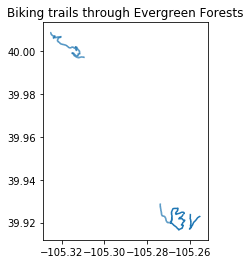

In [149]:
wgs84.plot(figsize=(4,4)
).set_title("Biking trails through Evergreen Forests")

In [150]:
#How about visualizing it in a browser?

with open('/home/cc/www/biking-trails-in-evergreen-forests.geojson','w') as outFile: 
    outFile.write(wgs84.to_json())

print("Now visit: http://townsendjennings.com/geo/?src=http://yetilabs.science/biking-trails-in-evergreen-forests.geojson")

Now visit: http://townsendjennings.com/geo/?src=http://yetilabs.science/biking-trails-in-evergreen-forests.geojson


In [154]:
#OR: Do a different search: 
value = 'Consolidated Rock Sparse Vegetation'
#What if I wanted to ride my bike in Evergreen Forests?
bike_trails = gpd.sjoin( 
    trails[trails.Bicycles=='Yes'], 
    veg[veg.d_SUBCLASS==value]
).dissolve(by='TrlID',aggfunc='sum')
print("Found {} trails with Bicycles through {}".format(len(bike_trails), value))
bike_trails.head()

Found 1 trails with Bicycles through Consolidated Rock Sparse Vegetation


,geometry,RID,Mileage,MeasuredFe,Shape_len_left,index_right,SUBCLASS,ACRES,Shape_area,Shape_len_right
TrlID,,,,,,,,,,
119,LINESTRING (3063439.701215297 1217009.35008072...,1125,0.76,4033,4012.534404,1567,12,1.770906,77140.649189,1972.571077


In [157]:
#Write the file to disk and take a look...

with open('/home/cc/www/biking-trails-custom.geojson','w') as outFile: 
    outFile.write(bike_trails.to_crs({'init':'epsg:4326'}).to_json())

print("Now visit: http://townsendjennings.com/geo/?src=http://yetilabs.science/biking-trails-custom.geojson")

Now visit: http://townsendjennings.com/geo/?src=http://yetilabs.science/biking-trails-custom.geojson


In [173]:
trails_with_water = gpd.sjoin(
    trails[trails.Bicycles=='Yes'],
    hydro
).dissolve(by='TrlID',aggfunc='sum')
print("Found {} trails that cross water".format(len(trails_with_water)))

Found 31 trails that cross water


In [190]:
with open('/home/cc/www/biking-trails-water.geojson','w') as outFile: 
    outFile.write(trails_with_water.query(
        'Mileage<0.5'
        ).to_crs({'init':'epsg:4326'}
    ).to_json()
);
        

In [191]:
print("Now visit: http://townsendjennings.com/geo/?src=http://yetilabs.science/biking-trails-water.geojson")

Now visit: http://townsendjennings.com/geo/?src=http://yetilabs.science/biking-trails-water.geojson


# Buildings?

In [136]:
buildings = gpd.read_file('data/Building_Footprints.shp')
print("Found {0} buildings".format(len(buildings)))
buildings.head()

Found 45728 buildings


,OBJECTID,FACILITYID,SHORTNAME,LONGNAME,FLOORCOUNT,BLDGTYPE,SUBTYPE,ACCESSTYPE,BLDGHEIGHT,GROUNDELEV,HISTORIC,CITYLIMIT,OWNEDBY,MAINTBY,OCCUPIEDBY,LIFECYCLE,CONFIDENCE,BUILDYEAR,geometry
0,1,BLDG1,None,None,None,Garage/Shed,None,None,7.0,5228.0,None,No,None,None,None,Active,2 Aerial,None,POLYGON ((-105.2245317361066 40.03380865582705...
1,2,BLDG2,None,None,None,Garage/Shed,None,None,13.0,5213.0,None,No,None,None,None,Active,2 Aerial,None,POLYGON ((-105.2250615931543 40.03258988479416...
2,3,BLDG3,None,None,None,Garage/Shed,None,None,10.0,5214.0,None,No,None,None,None,Active,2 Aerial,None,POLYGON ((-105.2251324080357 40.03216905929964...
3,4,BLDG4,None,None,None,Garage/Shed,None,None,35.0,5208.0,None,No,None,None,None,Active,2 Aerial,None,POLYGON ((-105.2219191779074 40.03348049114707...
4,5,BLDG5,None,None,None,Garage/Shed,None,None,10.0,5211.0,None,No,None,None,None,Active,2 Aerial,None,POLYGON ((-105.2223943793715 40.03346150072435...


In [194]:
crime = gpd.read_file('data/Target_Crime_Locations.shp')
crime.head()

,OBJECTID,REPORTNUM,REPORTDATE,BLOCKADD,OFFENSE,geometry
0,14950943,100005879,2010-05-10T07:00:00.000Z,19th St & Iris Ave,Vandalism,POINT (-105.2726935563568 40.03641117906543)
1,14950944,080016839,2008-12-15T07:00:00.000Z,2900 Block Glenwood Dr,Burglary,POINT (-105.2551157859522 40.03282370060626)
2,14950945,170003203,2017-03-16T07:00:00.000Z,1900 Block 29th St,Sex Assault,POINT (-105.2562485089662 40.01971060892392)
3,14950946,120006765,2012-05-19T07:00:00.000Z,800 Block 11th St,Robbery,POINT (-105.2786508425686 40.00278002872848)
4,14950947,080007937,2008-06-14T07:00:00.000Z,900 Block 30th St,Vandalism,POINT (-105.253104060112 40.00445429499652)


In [198]:
burglarized_buildings = gpd.sjoin(buildings, crime)

In [199]:
burglarized_buildings.BLOCKADD.value_counts()

Crime occurred at an unknown location    288
800 Block W Moorhead Cir                  13
3500 Block Spring Creek Pl                 6
Name: BLOCKADD, dtype: int64